# The Python Challenge
Homepage: http://www.pythonchallenge.com/

In [43]:
import numpy as np 

## Level 0 
### Solution: 274877906944

Just write 2^38 = 274877906944 in place of the 0 in current url.

## Level 1

### Solution: ocr

We are given the following text:

In [3]:
text = "g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."
text

"g fmnc wms bgblr rpylqjyrc gr zw fylb. rfyrq ufyr amknsrcpq ypc dmp. bmgle gr gl zw fylb gq glcddgagclr ylb rfyr'q ufw rfgq rcvr gq qm jmle. sqgle qrpgle.kyicrpylq() gq pcamkkclbcb. lmu ynnjw ml rfc spj."

and the solution is that every letter in the text has to be mapped to the letter in the to next positions in the alphabet, for example: g->i, k->m and so on.

In [4]:
# alphabet (with repeated "a" and "b" at the end)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','a','b']

# make a list
text = list( text )

In [5]:
def decrypt(text):
    for i in range(len(text)):
        # skip characters which do not have to be mapped
        if text[i] in alphabet:
            # find the position of current character text[i] in the alphabet 
            pos_c_in_alphabet = [ pos for pos, char in enumerate(alphabet[:26]) if char == text[i] ]
            # cast the position to int and add 2 
            new_decrypr_pos = int( "".join(map(str, pos_c_in_alphabet)) ) + 2
            # assign the new letter from the alphabet to the original one in text[i]
            text[i] = alphabet[new_decrypr_pos]
        #endif
    #endfor
    # join in a single string the decrypted text
    text = "".join(text)
    return text
#endfunction

In [6]:
# decrypt text
newtext = decrypt(text)

In [7]:
print( newtext )

i hope you didnt translate it by hand. thats what computers are for. doing it in by hand is inefficient and that's why this text is so long. using string.maketrans() is recommended. now apply on the url.


I didn't know about string.maketrans()$\dots$ Anyway, it says to now decrypt the current url:

In [8]:
url = "http://www.pythonchallenge.com/pc/def/map.html"
url = list( url )
newurl = decrypt(url)
print('Go here:', newurl)

Go here: jvvr://yyy.ravjqpejcnngpig.eqo/re/fgh/ocr.jvon


You realise that the above url does not exits and that the solution is to write "ocr" in current url. This will send to the next level.

## Level 2

### Solution: equality
We have to see to the source page. There will be a comment saying "find rare characters in the mess below", where the mess below is this:

In [9]:
mess = open('txt/level-2.txt').read()

The messy text has been copied and pasted from the web source to a txt file.

The solution requires trasforming the mess text into list, counting the elements, and look for the ones that 
appear with less frequency.

In [10]:
listmess = list(mess)

In [11]:
from collections import Counter

print('Elements in the list: ')
print( Counter(listmess).keys()   ) # returns unique elements in the list 
print('\nFrequency: ')
print( Counter(listmess).values() ) # counts the elements' frequency

Elements in the list: 
dict_keys(['%', '$', '@', '_', '^', '#', ')', '&', '!', '+', ']', '*', '}', '[', '(', '{', '\n', 'e', 'q', 'u', 'a', 'l', 'i', 't', 'y'])

Frequency: 
dict_values([6104, 6046, 6157, 6112, 6030, 6115, 6186, 6043, 6079, 6066, 6152, 6034, 6105, 6108, 6154, 6046, 1219, 1, 1, 1, 1, 1, 1, 1, 1])


We see the letters 'e', 'q', 'u', 'a', 'l', 'i', 't', 'y' appear only once, respectively. 
Then, "equality.html" will send to the next level.

## Level 3

### Solution: linkedlist.php

We have to see again the source page. There is a comment with a messy text. This is saved in level-3.txt

The hint says: "One small letter, surrounded by EXACTLY three big bodyguards on each of its sides".

We have to found the lowercase letters in the messy text sourrounded by 3 consecutive capital letters, for example JLKgOPO (we should get "o").

In [12]:
# import regex
import re 

In [13]:
text = open('txt/level-3.txt').read()

In [14]:
pattern = "[^A-Z][A-Z]{3}([a-z])[A-Z]{3}[^A-Z]"
letters = re.findall(pattern,text)

# join the list
print( "".join(letters) )

linkedlist


Put "linkedlist" in the url (and also change .php with .html again) to go to the next level. 

## Level 4

### Solution: peak.html

The is a large picture, with a link to a plain webpage saying the message 
"and the next nothing is <num>" where num is a number. If you manually change the number in the current url with the one in the message, you are directed to a new webpage with the same message, but with a different number.
 
The task is extract the number in the message of these webpages and automatically update urls until reach the solution.

In [15]:
import requests
import urllib.request
from bs4 import BeautifulSoup

import re 

We get the current url. Then we write the pattern that we should use (regex).

In [16]:
url     = "http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing=12345"
pattern = "and the next nothing is (\d+)"   

Next, we define a function that takes in input the pattern and current url. The function recovers the number 
in the webpage so that to obtain the new url. When there is no match (i.e., no number is found in the pattern) the loop breaks. 

In [17]:
def nexturl(url, pattern):
    while True:   
        # get the message from current url
        page = requests.get(url)
        soup = BeautifulSoup(page.text,'html.parser')
        text = soup.get_text()
        # print the message
        print(text)
        # find the number 
        match = re.search(pattern, soup.get_text()) 
        if match is not None:
            # get the next url: 
            # - get the url up to the "=" of the current url 
            # - add "=" 
            # - add the the number in current url that will direct to the next url 
            url = re.split("=", url)[0] + "=" + text.split()[-1]
        else:
            break
        #endif 
#endfunction

In [250]:
# takes a while
nexturl(url, pattern)

and the next nothing is 44827
and the next nothing is 45439
Your hands are getting tired and the next nothing is 94485
and the next nothing is 72198
and the next nothing is 80992
and the next nothing is 8880
and the next nothing is 40961
and the next nothing is 58765
and the next nothing is 46561
and the next nothing is 13418
and the next nothing is 41954
and the next nothing is 46782
and the next nothing is 92730
and the next nothing is 89229
and the next nothing is 25646
and the next nothing is 74288
and the next nothing is 25945
and the next nothing is 39876
and the next nothing is 8498
and the next nothing is 34684
and the next nothing is 62316
and the next nothing is 71331
and the next nothing is 59717
and the next nothing is 76893
and the next nothing is 44091
and the next nothing is 73241
and the next nothing is 19242
and the next nothing is 17476
and the next nothing is 39566
and the next nothing is 81293
and the next nothing is 25857
and the next nothing is 74343
and the next 

Here, we have to take the last number and divide it by two, i.e. 16044/2. And keep going.

That is, we update the initial url with the new number and call the function "nexturl" again (the pattern should stay the same).

In [18]:
url = "http://www.pythonchallenge.com/pc/def/linkedlist.php?nothing=" + str( int(16044/2) )

In [254]:
nexturl(url, pattern)

and the next nothing is 25357
and the next nothing is 89879
and the next nothing is 80119
and the next nothing is 50290
and the next nothing is 9297
and the next nothing is 30571
and the next nothing is 7414
and the next nothing is 30978
and the next nothing is 16408
and the next nothing is 80109
and the next nothing is 55736
and the next nothing is 15357
and the next nothing is 80887
and the next nothing is 35014
and the next nothing is 16523
and the next nothing is 50286
and the next nothing is 34813
and the next nothing is 77562
and the next nothing is 54746
and the next nothing is 22680
and the next nothing is 19705
and the next nothing is 77000
and the next nothing is 27634
and the next nothing is 21008
and the next nothing is 64994
and the next nothing is 66109
and the next nothing is 37855
and the next nothing is 36383
and the next nothing is 68548
and the next nothing is 96070
and the next nothing is 83051
and the next nothing is 58026
and the next nothing is 44726
and the next

Update the url with peak.html and go to next level.

## Level 5
### Solution: channel

There is a picture with a hill. The message says "pronunce it". We see again at the web source and we find an hidden comment "peak hell sounds familiar ?" inside a peakhell tag with source to "banner.p". 

This is the following url:
http://www.pythonchallenge.com/pc/def/banner.p. 
It contains a series of characters.
We copy and paste the content in level-5.txt.

The hint "pronunce it" suggests to pronunce "peak hell" which sounds like *pickle* that is a python's pickle module for serialise objects so that they can be saved to a file and loaded back.

In [19]:
import pickle

In [20]:
# open the pickled text
pickledtext = open('txt/level-5.txt','rb')

# assign the pickled data (unpickled)
pickleddata = pickle.load(pickledtext)

# close file
pickledtext.close()

In [21]:
# pickleddata is a list of tuple
for i in range(4):
    print( pickleddata[i] )

[(' ', 95)]
[(' ', 14), ('#', 5), (' ', 70), ('#', 5), (' ', 1)]
[(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)]
[(' ', 15), ('#', 4), (' ', 71), ('#', 4), (' ', 1)]


and this looks like 95 times blank space, then (probably on new line) 14 times a blank space, 5 times a "#" 
and so on...

We have to print this appropriately.

In [22]:
for i in range( len(pickleddata) ):
    currentstr = ''
    for j in range( len(pickleddata[i]) ):
        currentstr = currentstr + (pickleddata[i][j][0] * pickleddata[i][j][1])
    #endfor
    print('{}'.format(currentstr))
#endfor

                                                                                               
              #####                                                                      ##### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
               ####                                                                       #### 
      ###      ####   ###         ###       #####   ###    #####   ###          ###       #### 
   ###   ##    #### #######     ##  ### 

Done. Go to the next level by typing "channel.html" in the url.

## Level 6

### Solution: oxygen

There is a picture with a zip and a paypal button which clearly we don't want to push (it redirects to a apge to make a paypal donation). If we look at the source page, we see an initial comment "<-- zip -->". 

Basically, if in the url, we change the ".html" with ".zip" we download a zipped file called "channel.zip". 
Inside there are a lot of .txt files and a readme.txt. 

The latter says:

In [23]:
readme = open("files/channel/readme.txt").read()
print( readme )

welcome to my zipped list.

hint1: start from 90052
hint2: answer is inside the zip



It seems that we have to look inside the 90052.txt file.

In [24]:
txtfile = open("files/channel/90052.txt").read()
txtfile

'Next nothing is 94191'

In [25]:
txtfile = open("files/channel/94191.txt").read()
txtfile

'Next nothing is 85503'

and so on... This is similar to previous level. Let us make the process automatic.

In [26]:
import re

In [28]:
pattern     = "nothing is (\d+)"
nextnothing = "90052"

In [29]:
itr = 1
while True:
    txtfile = open("files/channel/" + nextnothing + ".txt").read()
    print(txtfile)    
    match = re.search(pattern,txtfile)
    if match is not None:
        nextnothing = match.groups(1)[0]
        itr = itr + 1
    else:
        print('\nNEXT NOTHING NOT FOUND')
        print("Last (current) nothing: " + nextnothing + " ({})".format(itr))
        break
    #endif
#endwhile

Next nothing is 94191
Next nothing is 85503
Next nothing is 70877
Next nothing is 15409
Next nothing is 60838
Next nothing is 80009
Next nothing is 21347
Next nothing is 24164
Next nothing is 13836
Next nothing is 80123
Next nothing is 92453
Next nothing is 69556
Next nothing is 31491
Next nothing is 13371
Next nothing is 88143
Next nothing is 82593
Next nothing is 30645
Next nothing is 88985
Next nothing is 27190
Next nothing is 24448
Next nothing is 37468
Next nothing is 49892
Next nothing is 54714
Next nothing is 75161
Next nothing is 893
Next nothing is 57882
Next nothing is 40033
Next nothing is 29521
Next nothing is 5289
Next nothing is 4701
Next nothing is 32742
Next nothing is 18751
Next nothing is 68586
Next nothing is 53984
Next nothing is 52184
Next nothing is 43807
Next nothing is 56300
Next nothing is 97649
Next nothing is 88244
Next nothing is 91669
Next nothing is 88394
Next nothing is 77575
Next nothing is 70208
Next nothing is 78211
Next nothing is 84854
Next nothing i

Next nothing is 57709
Next nothing is 52400
Next nothing is 94833
Next nothing is 65415
Next nothing is 80057
Next nothing is 73422
Next nothing is 86874
Next nothing is 94159
Next nothing is 16466
Next nothing is 6549
Next nothing is 92525
Next nothing is 40627
Next nothing is 27531
Next nothing is 88177
Next nothing is 4465
Next nothing is 99189
Next nothing is 47856
Next nothing is 83694
Next nothing is 54379
Next nothing is 47454
Next nothing is 87096
Next nothing is 3469
Next nothing is 99254
Next nothing is 4630
Next nothing is 75878
Next nothing is 21776
Next nothing is 92781
Next nothing is 23060
Next nothing is 89587
Next nothing is 18346
Next nothing is 47867
Next nothing is 41004
Next nothing is 13430
Next nothing is 381
Next nothing is 8755
Next nothing is 58832
Next nothing is 92450
Next nothing is 64821
Next nothing is 84642
Next nothing is 2105
Next nothing is 17305
Next nothing is 60154
Next nothing is 77752
Next nothing is 39994
Next nothing is 30257
Next nothing is 60

Next nothing is 78311
Next nothing is 65698
Next nothing is 95457
Next nothing is 28935
Next nothing is 58156
Next nothing is 12445
Next nothing is 21019
Next nothing is 81654
Next nothing is 82814
Next nothing is 75481
Next nothing is 41055
Next nothing is 55067
Next nothing is 49768
Next nothing is 7422
Next nothing is 30983
Next nothing is 81931
Next nothing is 45122
Next nothing is 75101
Next nothing is 71773
Next nothing is 52323
Next nothing is 41386
Next nothing is 36729
Next nothing is 24027
Next nothing is 82430
Next nothing is 53824
Next nothing is 75518
Next nothing is 38146
Next nothing is 27401
Next nothing is 1321
Next nothing is 20200
Next nothing is 30934
Next nothing is 43923
Next nothing is 9472
Next nothing is 87617
Next nothing is 7973
Next nothing is 40413
Next nothing is 34242
Next nothing is 51833
Next nothing is 7298
Next nothing is 26372
Next nothing is 22704
Next nothing is 87196
Next nothing is 1866
Next nothing is 10454
Next nothing is 8810
Next nothing is 1

The last .txt file says "Collect the comments". 

The second hint in the readme said that the answer was inside the zip, and we know that a zip file may contain 
comments. We have to look at them.

In [30]:
from zipfile import ZipFile 

In [32]:
zippedfile = "files/channel.zip"
archive    = ZipFile(zippedfile, 'r')
# archive.printdir()   #prints out the content of the zipped file

# make a list of "zipfile.ZipInfo" 
infolist = archive.infolist()
#infolist 

In [33]:
# print comments with ".comment" 
for info in infolist:
    # (decode("utf-8") trasforms the comment from byte string to simple string)
    print( info.comment.decode() , end='') 
#endfor

E Y  *E  Y ON *****  *Y *E
*OG  
* Y    G E* Y   E* N*  G**G*   ** * * *  * O    X**E *E*    * X *   *   GE Y**OOGX*** ** *   *E **X O E* E  *** *
 N   * XG E  * NN  G*   XEX** Y XN  *OO O  *G G*OO G*Y**    *Y N Y*  X*
 *G***  N   N  * 
  X**Y * E* **YO***N * *** X* E*  ** X
O***   X*
N * *X
  * * *   * *G  ** O  YN X N ***Y   ***  ***X ***E  E **E   *N*G* ** Y E**  ** *   ** O* * **  OG** OO  O***
 X  Y**  G E  ** E** Y **  X N*YO* O X  X* GN* Y***  X* *O * O G* *O N*** G
 E *N*YE  **O* E*  * *  ***  * *N*   E*Y
  *NY   * E X* O   * *  * YG* NYG  ** O**   O     
E  *Y   GY  ** X  ** **  G E** **  *O* * **** * * *  *** *    *O  *EX  *E  OG** **Y* *
 OO** * *  *    *  ** * * ***N ** * X    *XX  ** E* G  * * X* *EXG*  *  **O  ** * YE    OY *  *E  Y * *  *  *N** Y* *    *G G*  X***N   *    *E**  ** *O*X   *   O **    YX  **E**  * YO *   O     X *X*    *XX  O*  *       
  E *****    E *** ** ** GY*G*

This is not useful. Well, the hidden message will appear if we print out the comment by following the order given by the "next nothings" in the .txt files. 

To do this, we make a matrix containing on the first column linear indices and aon the second column the number of the name of each .txt file:

In [34]:
# we do not have to consider the readme file 
idx = np.arange(0,len(infolist)-1)

nothings = []
for info in infolist[:-1]:
    nothings.append( int(info.filename[:-4]) )
#endfor

mat = np.c_[idx, np.array( nothings ) ]
mat

array([[    0,    29],
       [    1,   100],
       [    2,   109],
       ...,
       [  906, 99714],
       [  907, 99775],
       [  908, 99905]])

Finally, let us iterate through the commnets in the order given by the "next nothings".

In [35]:
# reassign the first next nothing
nextnothing = "90052"

while True:
    # get the text in current file
    txtfile = open("files/channel/" + nextnothing + ".txt").read()
    
    match = re.search(pattern,txtfile)
    
    if match is not None:
        # nextnothing number (is a string)
        nextnothing = match.groups(1)[0] 
        
        # find the index of the list with filename equal to "nextnothing.txt"
        nextnothingidx = np.where( mat[:,1] == int(nextnothing) )
        cidx = mat[nextnothingidx , 0]
        
        # now recover the comment from "nextnothing.txt" file
        # (decode("utf-8") trasforms the comment from byte string to simple string)
        c = infolist[int(cidx)].comment.decode("utf-8") 
        
        # finally print the character in current comment
        print(c, end='')                 
    else:
        break
    #endif
#endwhile

***************************************************************
****************************************************************
**                                                            **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE NN      NN  **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE  NN    NN   **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE       NN  NN    **
**   OOOOOOOO XX    XX YY        GGG       EEEEE     NNNN     **
**   OOOOOOOO XX    XX YY        GGG       EEEEE      NN      **
**   OO    OO XXX  XXX YYY   YY  GG GG     EE         NN      **
**   OO    OO  XXXXXX   YYYYYY   GG   GG   EEEEEE     NN      **
**   OO    OO    XX      YYYY    GG    GG  EEEEEE     NN      **
**                                                            **
****************************************************************
 **************************************************************


Let us replace "channel.html" with "hockey.html"

A new plain webpage says "**it's in the air. look at the letters.**". If we look at the web source we don't find anything. Then if we look closer at the message "hockey" above, we realise that the word is written with letters, that put together give "**oxygen**". 

Go to the next level by renaming the url with "oxygen.html".

## Level 7

### Solution: integrity 

There is a picture, with a sequence of little squares in grayscale. Nothing else. 

We have to read the picture from the url and analyse it.

In [407]:
from urllib.request import urlopen
from PIL import Image

In [408]:
url = "http://www.pythonchallenge.com/pc/def/oxygen.png"
img = Image.open( urlopen(url) )

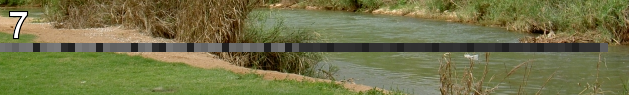

In [409]:
img

In [293]:
width, height = img.size
print('height:',height)
print('width: ',width)

height: 95
width:  629


We can get the pixels of the picture using numpy with one line

In [410]:
pixels = np.asarray(img)

In [411]:
pixels.shape

(95, 629, 4)

Here, pixels is a 95-by-629 matrix whose entries are a lists of 4 numbers.

In particular, pixels[i] is the i-th row of the matrix and each entry is a list of 4 elements 
because pixels are represented with RGB colormap where the fourth number denotes the alpha. 

We see that the gray band is approximately in the middle of the picture. If we manually look for the rows we see that the band stays on rows from 43 to 52:

In [412]:
# print, for example, the first column of pixel, from row 40 to row 55
for i in range(40,55):
    print( pixels[i][0] )
#endfor

[129 145  74 255]
[121 137  66 255]
[124 135  67 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[115 115 115 255]
[ 98 127  47 255]
[105 134  54 255]
[ 96 123  44 255]


We can see that the band has the same pixel color. 

Hence, in the first column of the matrix pixels, we see that the block of repeated 9 entries "[115 115 115 255]" represents the pixels in the first column of the first gray block in the band. These rows are 43-52.

Let us get the band by saving the pixels in a matrix of size 9-by-width-by-3 (we don't save the alpha).

In [413]:
def getband(bandheight,width,initialidx):
    band = np.zeros((bandheight,width,3))
    for i in range(bandheight): 
        for j in range(width):
            band[i,j] = np.array( pixels[i + initialidx][j][:-1] ) 
    return band
#endfunction

In [414]:
initialidx = 43
bandheight = 9 
band = getband(bandheight,width,initialidx)
print( band.shape )

(9, 629, 3)


Double check: let us plot the band to see if we made some mistake.

In [415]:
import matplotlib.pyplot as plt

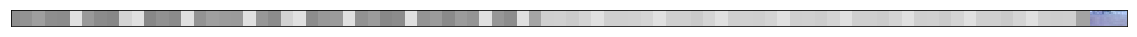

In [416]:
fig, ax = plt.subplots(1,1, figsize=(20, 4))
ax.imshow( (band * 255).astype(np.uint8) ) 
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Ok. Now, we have a band of gray squares, plus some other pixels the end. 

Clearly, in each little gray square, the numbers (the pixels values) are the same. 
That is, let us just pick the first row of the band:

In [417]:
firstrowband = []
for j in range(width):
    firstrowband.append( band[0][j][0] )
print(firstrowband)

[115.0, 115.0, 115.0, 115.0, 115.0, 109.0, 109.0, 109.0, 109.0, 109.0, 109.0, 109.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 114.0, 116.0, 116.0, 116.0, 116.0, 116.0, 116.0, 116.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 103.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 121.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 111.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 117.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 109.0, 109.0, 109.0, 109.0, 109.0, 109.0, 109.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 97.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0, 101.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 105.0, 116.0, 116.0, 116.0, 116.0, 116.0

Ok. These number have then to be mapped into letters, using chr().

In [418]:
def mapintochar(vec_of_int):
    getchar = lambda num: chr(num)
    return [ getchar( int(vec_of_int[num]) ) for num in range(0,len(vec_of_int)) ]
#endfunction

In [419]:
text = mapintochar( firstrowband )
print( "".join(text) )

sssssmmmmmmmaaaaaaarrrrrrrttttttt       ggggggguuuuuuuyyyyyyy,,,,,,,       yyyyyyyooooooouuuuuuu       mmmmmmmaaaaaaadddddddeeeeeee       iiiiiiittttttt.......       ttttttthhhhhhheeeeeee       nnnnnnneeeeeeexxxxxxxttttttt       llllllleeeeeeevvvvvvveeeeeeelllllll       iiiiiiisssssss       [[[[[[[111111100000005555555,,,,,,,       111111111111110000000,,,,,,,       111111111111116666666,,,,,,,       111111100000001111111,,,,,,,       111111100000003333333,,,,,,,       111111111111114444444,,,,,,,       111111100000005555555,,,,,,,       111111111111116666666,,,,,,,       111111122222221111111]]]]]]]]Aunpq¡¦USakjmbg^


Due to the repeated values, the message is messy, but we can clearly read the sentence:

"*smart guy, you made it. the next level is [105, 110, 116, 101, 103, 114, 105, 116, 121]*", 

plus the rubbish at the end, since we have not cut the band before the noisy pixels. It is clear that we have to map these numbers to chars again:

In [420]:
text = mapintochar( [105, 110, 116, 101, 103, 114, 105, 116, 121] )
print( "".join(text) )

integrity


That's the solution!

## Level 8